# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading the dataset

In [3]:
df = pd.read_csv('supermart Grocery Sales Dataset.csv')
df.head(3)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu


# Understanding the dataset

In [4]:
df.size

109934

In [5]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,1496.596158,577.559036,500.00,1000.0000,1498.00,1994.7500,2500.00
Discount,9994.0,0.226817,0.074636,0.10,0.1600,0.23,0.2900,0.35
Profit,9994.0,374.937082,239.932881,25.25,180.0225,320.78,525.6275,1120.95


In [8]:
df.describe(include='object')

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,State
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,9994,50,7,23,24,1236,5,1
top,OD1,Amrish,Snacks,Health Drinks,Kanyakumari,09-05-2017,West,Tamil Nadu
freq,1,227,1514,719,459,38,3203,9994


In [9]:
for col in df.describe(include='object'):
    print(col)
    print(df[col].unique())
    print('-'*50)

Order ID
['OD1' 'OD2' 'OD3' ... 'OD9992' 'OD9993' 'OD9994']
--------------------------------------------------
Customer Name
['Harish' 'Sudha' 'Hussain' 'Jackson' 'Ridhesh' 'Adavan' 'Jonas' 'Hafiz'
 'Krithika' 'Ganesh' 'Yadav' 'Sharon' 'Peer' 'Sundar' 'Ramesh' 'Alan'
 'Arutra' 'Haseena' 'Verma' 'Muneer' 'Veronica' 'Shah' 'Mathew' 'Akash'
 'Anu' 'Sabeela' 'James' 'Willams' 'Malik' 'Amrish' 'Vince' 'Suresh'
 'Esther' 'Yusuf' 'Komal' 'Veena' 'Shree' 'Roshan' 'Sudeep' 'Vinne'
 'Vidya' 'Arvind' 'Kumar' 'Amy' 'Ravi' 'Sheeba' 'Ram' 'Rumaiza' 'Aditi'
 'Surya']
--------------------------------------------------
Category
['Oil & Masala' 'Beverages' 'Food Grains' 'Fruits & Veggies' 'Bakery'
 'Snacks' 'Eggs, Meat & Fish']
--------------------------------------------------
Sub Category
['Masalas' 'Health Drinks' 'Atta & Flour' 'Fresh Vegetables'
 'Organic Staples' 'Fresh Fruits' 'Biscuits' 'Cakes' 'Chocolates' 'Eggs'
 'Cookies' 'Chicken' 'Edible Oil & Ghee' 'Mutton' 'Soft Drinks'
 'Dals & Pulses' '

In [10]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [11]:
df[df.duplicated()]

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State


## Observations 
1. We can drop State column as it only contains single value repeated.
2. We have to correct datatype of `Order Date` column.
3. We can drop the `Order ID` column as it is NOT useful for our analysis.
4. We have to extract month and year data from `Order Date` column

# EDA and Data Cleaning

In [14]:
df.drop(columns=['Order ID', 'State'], axis=1, inplace=True)

In [15]:
df.head(2)

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
0,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28
1,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80


In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer Name  9994 non-null   object        
 1   Category       9994 non-null   object        
 2   Sub Category   9994 non-null   object        
 3   City           9994 non-null   object        
 4   Order Date     9994 non-null   datetime64[ns]
 5   Region         9994 non-null   object        
 6   Sales          9994 non-null   int64         
 7   Discount       9994 non-null   float64       
 8   Profit         9994 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 702.8+ KB


In [17]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df.sample(2)

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,Order Month,Order Year
6310,Muneer,"Eggs, Meat & Fish",Mutton,Pudukottai,2016-11-15,East,1853,0.15,129.71,11,2016
1400,Peer,Food Grains,Atta & Flour,Coimbatore,2015-07-22,West,1707,0.32,238.98,7,2015


In [18]:
df['Region'].value_counts()

Region
West       3203
East       2848
Central    2323
South      1619
North         1
Name: count, dtype: int64

#### Since North is present only once in the whole dataset as a categorical column, we can remove it.

In [20]:
df = df[df['Region'] != 'North']

In [21]:
df['Region'].value_counts()

Region
West       3203
East       2848
Central    2323
South      1619
Name: count, dtype: int64

# Data Visualizations

## Profit by Region

In [23]:
profit_by_region = df['Profit'].groupby(df['Region']).sum()/10**5
profit_by_region

Region
Central     8.568068
East       10.743456
South       6.235629
West       11.920046
Name: Profit, dtype: float64

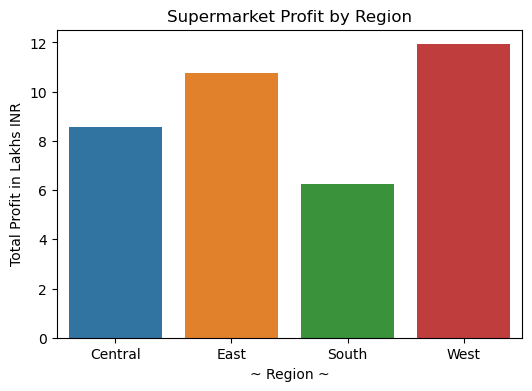

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(x=profit_by_region.index, y=profit_by_region.values)
plt.xlabel('~ Region ~')
plt.ylabel('Total Profit in Lakhs INR')
plt.title('Supermarket Profit by Region')
plt.show()

### Conclusion 
    West Region is most profitable

## Profit by Category 

In [26]:
profit_by_category = df['Profit'].groupby(df['Category']).sum()/10**5
profit_by_category

Category
Bakery               5.285211
Beverages            5.256058
Eggs, Meat & Fish    5.673572
Food Grains          5.291626
Fruits & Veggies     5.304004
Oil & Masala         4.974940
Snacks               5.681788
Name: Profit, dtype: float64

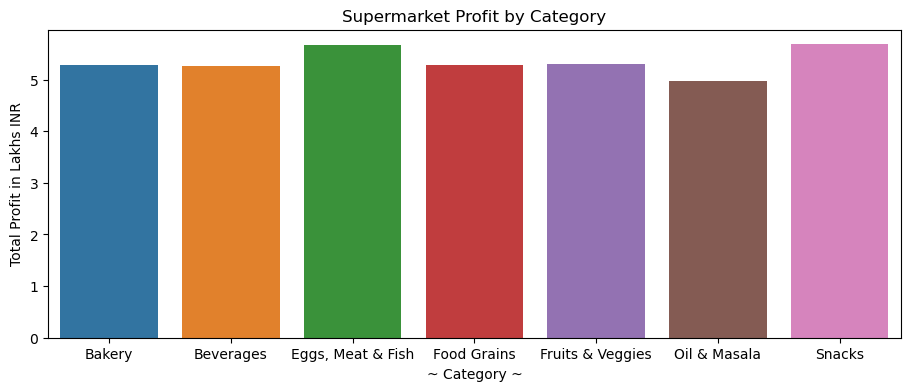

In [27]:
plt.figure(figsize=(11,4))
sns.barplot(x=profit_by_category.index, y=profit_by_category.values)
plt.xlabel('~ Category ~')
plt.ylabel('Total Profit in Lakhs INR')
plt.title('Supermarket Profit by Category')
plt.show()

### Conclusion 
    `Snacks` and `Eggs, Meat & Fish` are the most profitable categories

## Finding the most loyal customers by analyzing sales volume of each customer

In [29]:
most_loyal_customers = df['Sales'].groupby(df['Customer Name']).sum().sort_values(ascending=False).head(10)
most_loyal_customers

Customer Name
Krithika    334361
Amrish      333351
Verma       331665
Arutra      325720
Vidya       321798
Vinne       319565
Shah        318588
Suresh      315973
Adavan      315341
Surya       312645
Name: Sales, dtype: int64

### Conclusion -> Most loyal customers are :- 
    'Krithika', 'Amrish', 'Verma', 'Arutra', 'Vidya', 'Vinne', 'Shah',  'Suresh', 'Adavan', 'Surya''

## Profit by Month

In [31]:
profit_by_month = df['Profit'].groupby(df['Order Month']).sum()/10**5
profit_by_month

Order Month
1     1.425185
2     1.160822
3     2.673473
4     2.474770
5     2.636434
6     2.632962
7     2.745946
8     2.589121
9     5.177886
10    3.093769
11    5.556468
12    5.300364
Name: Profit, dtype: float64

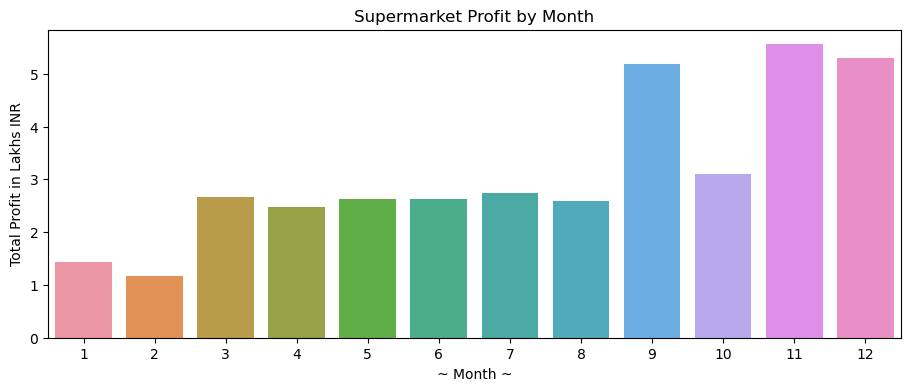

In [32]:
plt.figure(figsize=(11,4))
sns.barplot(x=profit_by_month.index, y=profit_by_month.values)
plt.xlabel('~ Month ~')
plt.ylabel('Total Profit in Lakhs INR')
plt.title('Supermarket Profit by Month')
plt.show()

### Conclusion
    November, December and September (being the festive months) are the most profitable months for the Supermarket

## Sales by Year

In [34]:
sales_by_year = df['Sales'].groupby(df['Order Year']).sum()/10**5
sales_by_year

Order Year
2015    29.75599
2016    31.31959
2017    38.70658
2018    49.77512
Name: Sales, dtype: float64

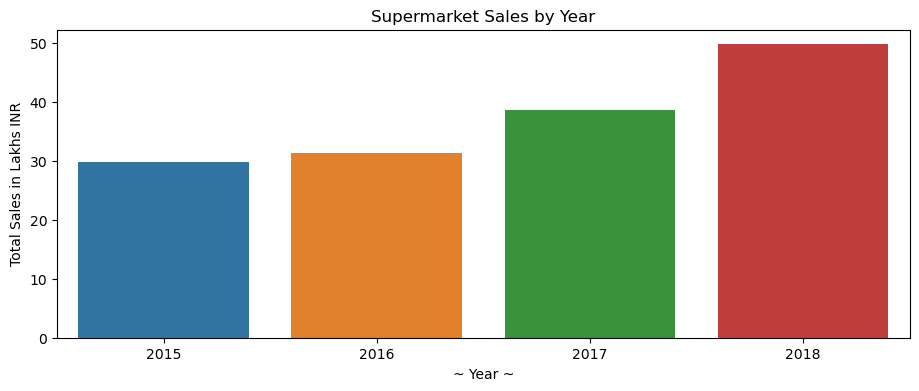

In [35]:
plt.figure(figsize=(11,4))
sns.barplot(x=sales_by_year.index, y=sales_by_year.values)
plt.xlabel('~ Year ~')
plt.ylabel('Total Sales in Lakhs INR')
plt.title('Supermarket Sales by Year')
plt.show()

### Conclusion 
    Supermarket is observing a steady RISE in sales